# Shipping Data 

## Context:

An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

## Content:

The dataset used for model building contained 10999 observations of 12 variables.
The data contains the following information:

* ID: ID Number of Customers.
* Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,F.
* Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
* Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
* Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
* Cost of the product: Cost of the Product in US Dollars.
* Prior purchases: The Number of Prior Purchase.
* Product importance: The company has categorized the product in the various parameter such as low, medium, high.
* Gender: Male and Female.
* Discount offered: Discount offered on that specific product.
* Weight in gms: It is the weight in grams.
* Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
import xgboost as xgb

## Import Data

In [2]:
df=pd.read_csv('shipping.csv')

In [3]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


## Data Exploration

In [4]:
df.shape

(10999, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,10999.0,NaN,NaN,NaN,5500.0,3175.28214,1.0,2750.5,5500.0,8249.5,10999.0
Warehouse_block,10999,5,F,3666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mode_of_Shipment,10999,3,Ship,7462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_care_calls,10999.0,NaN,NaN,NaN,4.054459,1.14149,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,NaN,NaN,NaN,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,NaN,NaN,NaN,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,NaN,NaN,NaN,3.567597,1.52286,2.0,3.0,3.0,4.0,10.0
Product_importance,10999,3,low,5297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10999,2,F,5545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Discount_offered,10999.0,NaN,NaN,NaN,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0


In [7]:
# Unique values in each columns

In [8]:
for i in df.columns:
    print(i,':',df[i].nunique())

ID : 10999
Warehouse_block : 5
Mode_of_Shipment : 3
Customer_care_calls : 6
Customer_rating : 5
Cost_of_the_Product : 215
Prior_purchases : 8
Product_importance : 3
Gender : 2
Discount_offered : 65
Weight_in_gms : 4034
Reached.on.Time_Y.N : 2


In [9]:
# showing null values in data

In [10]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

* It is cleaned data

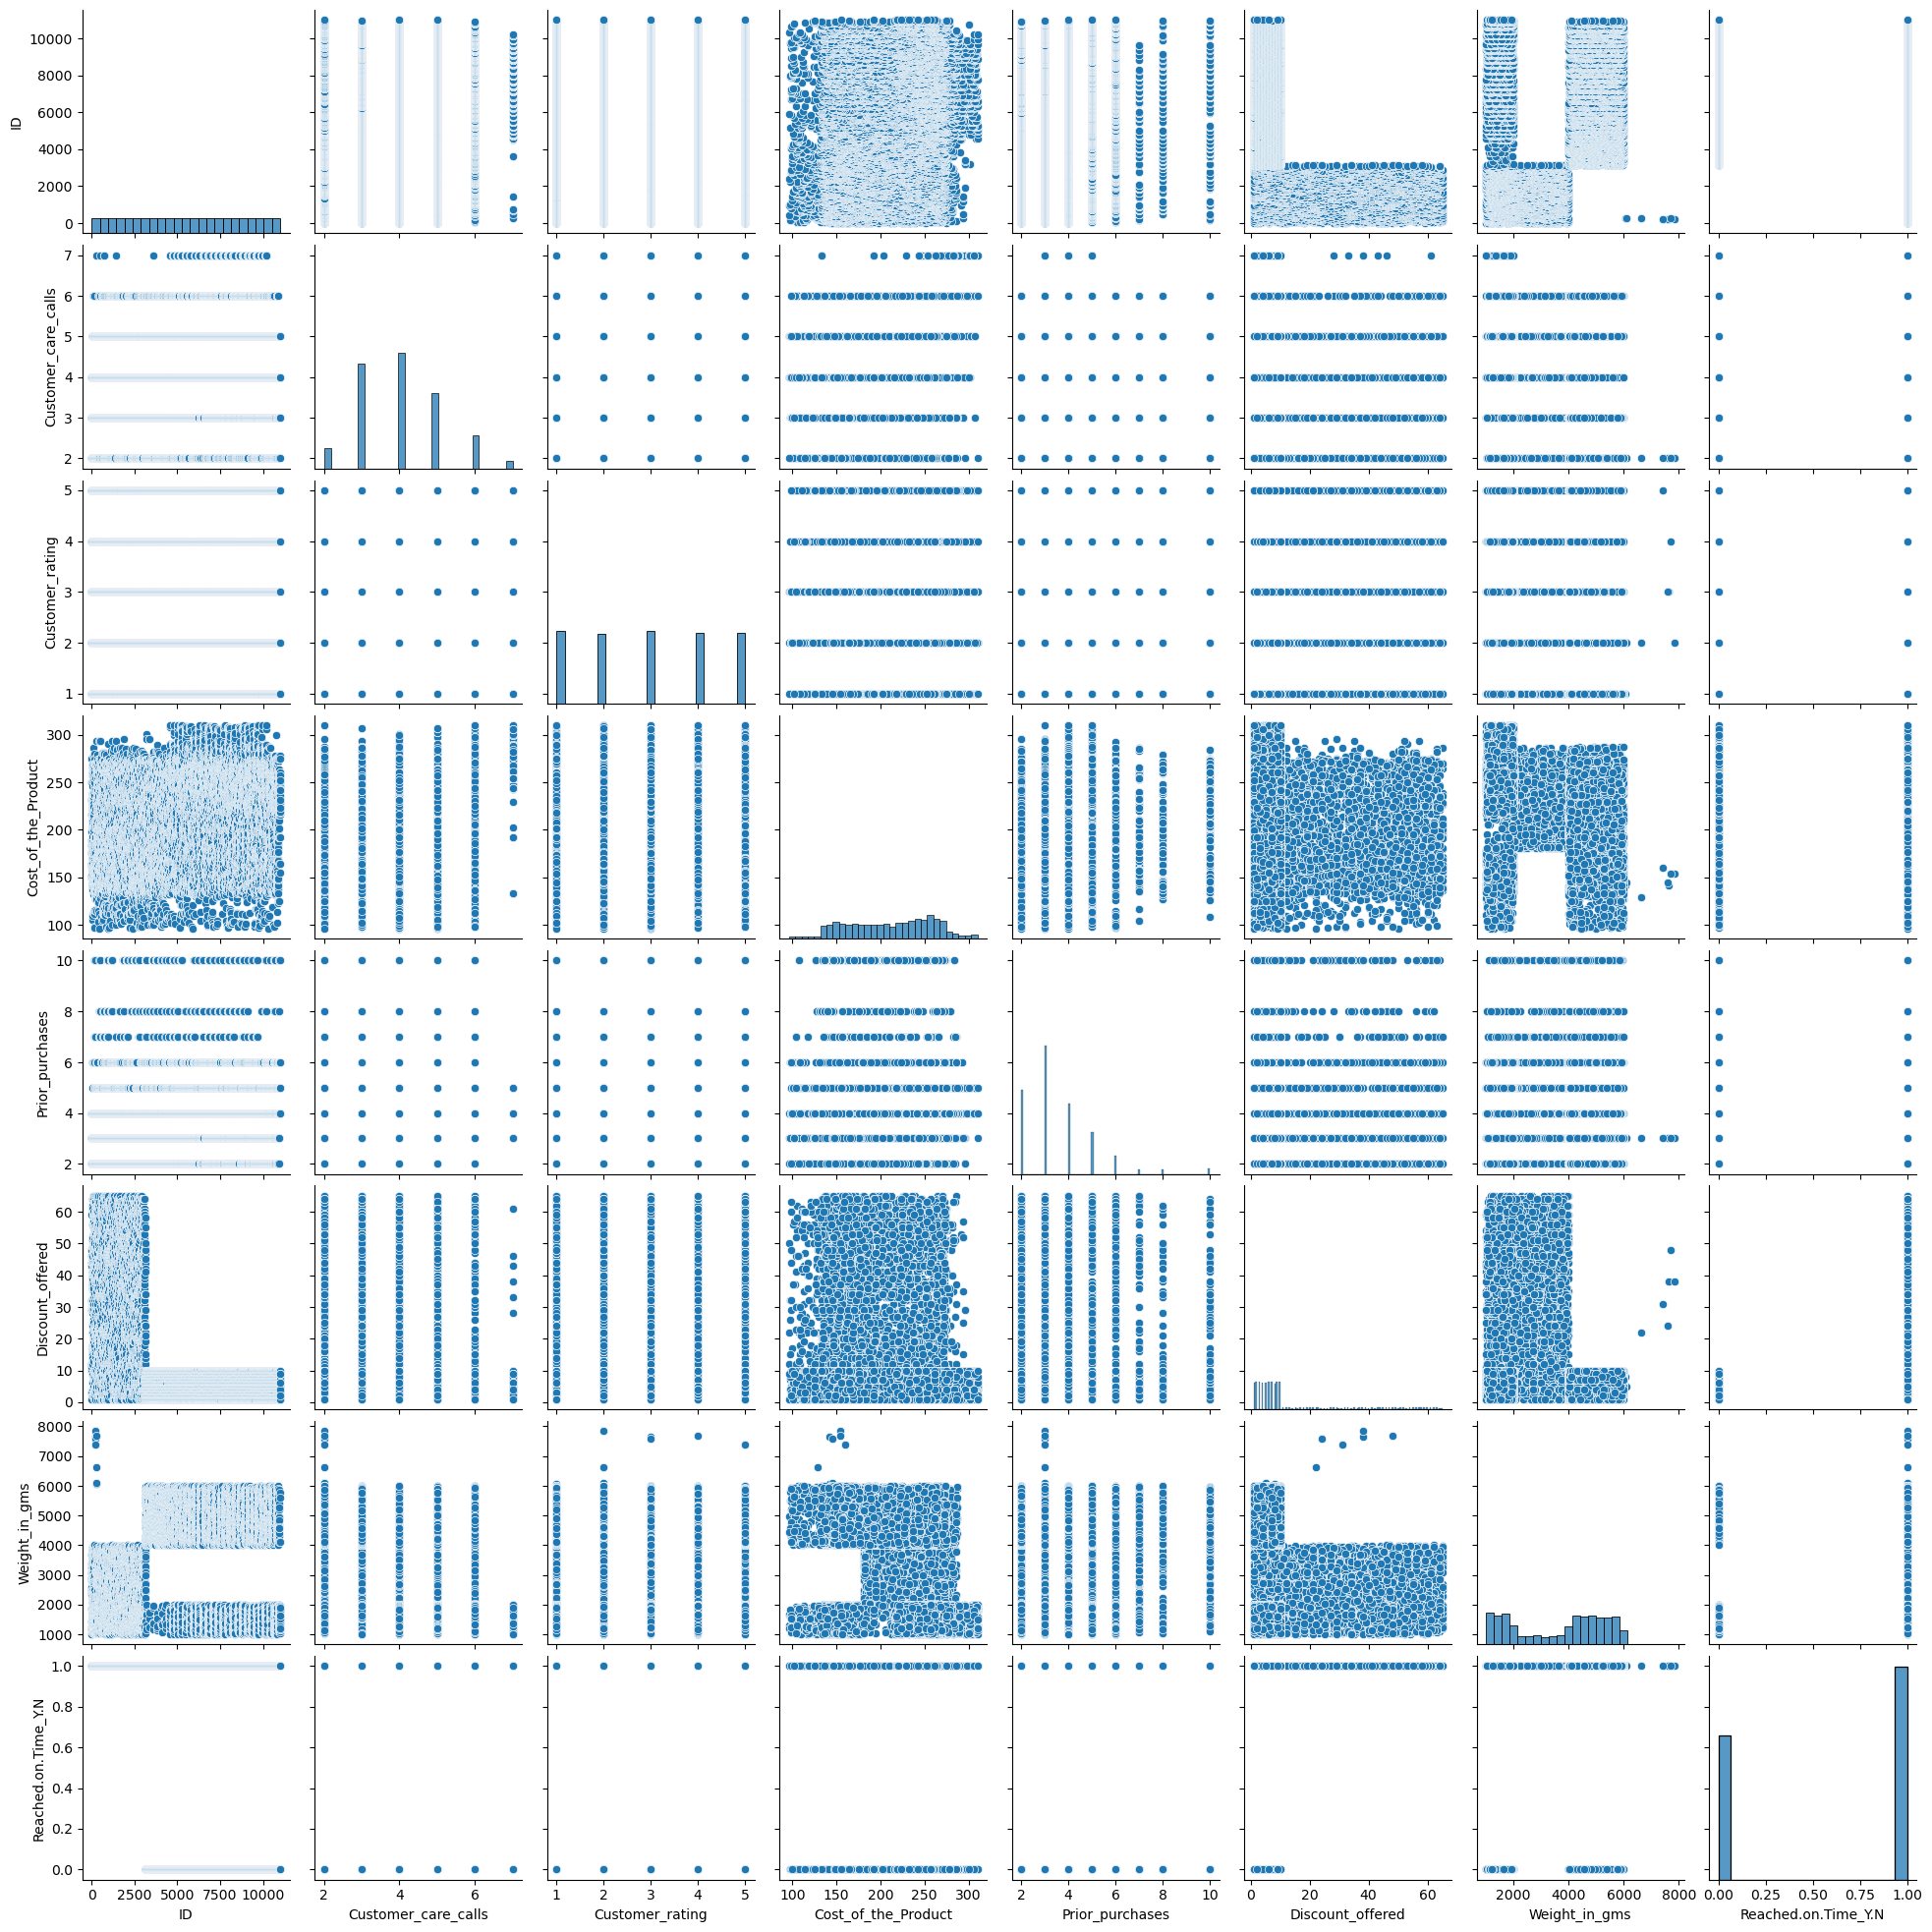

In [11]:
sns.pairplot(df)

C:\Users\DELL\AppData\Local\Temp\ipykernel_19548\2511212591.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot= True)


<Axes: >

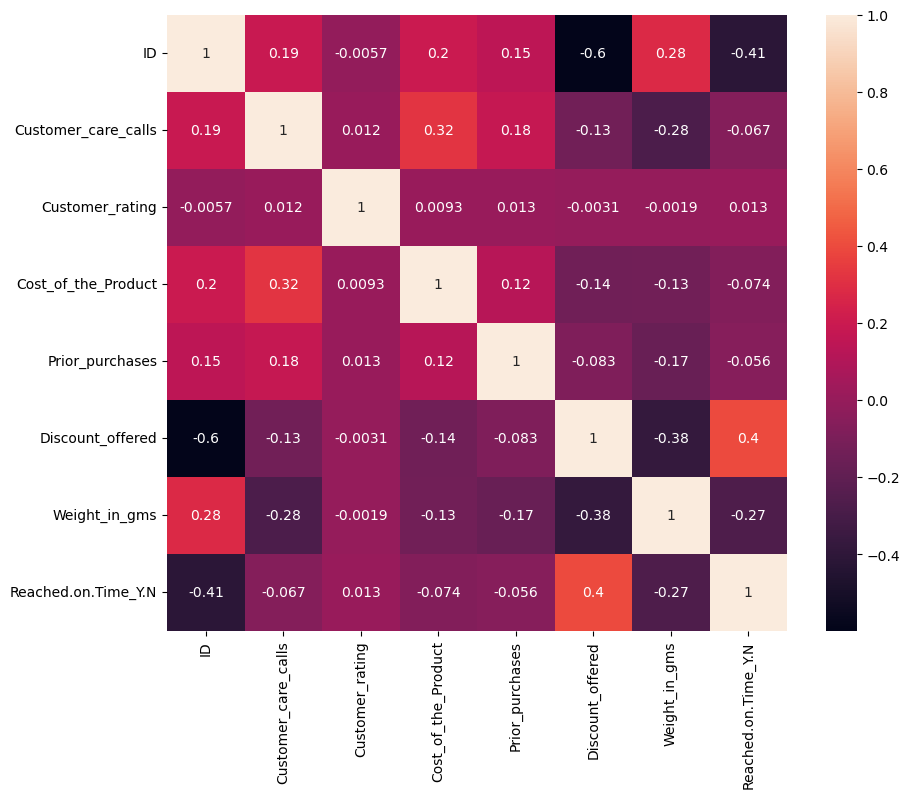

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot= True)

In [13]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


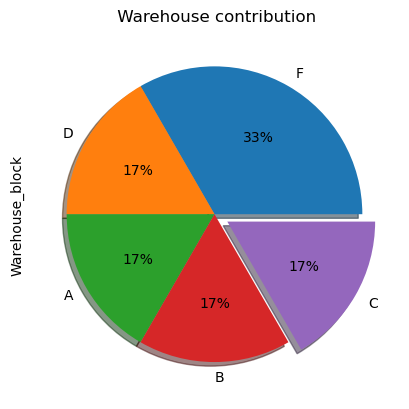

In [14]:
plt.title(' Warehouse contribution')
df['Warehouse_block'].value_counts().plot.pie(explode=(0,0,0,0,0.1),autopct="%.0f%%",shadow=True)
plt.show()

* 33% products are more stored in  block F may be that loaction  maximizes efficiency and accessibility. It helps streamline the movement of goods, reduce picking and packing times, and improve overall warehouse operations
* Other blocks are stores 17% of products

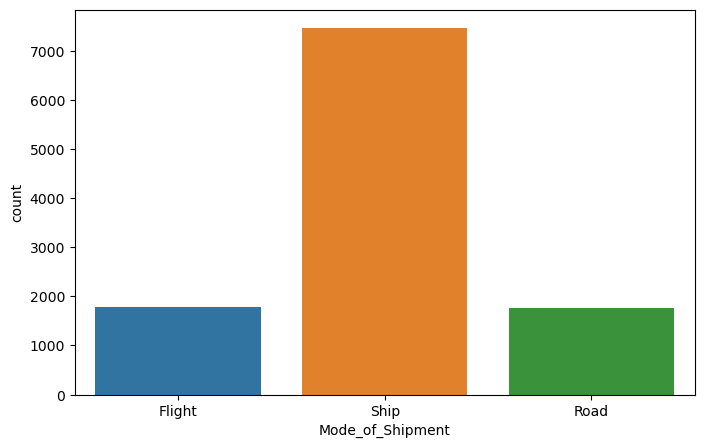

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(df,x='Mode_of_Shipment')
plt.show()

* Efficient product shipment is crucial for customer satisfaction, as delays or mishandling can lead to unhappy customers.
* Shipping by sea is an efficient method for transporting large quantities of goods over long distances. It's commonly used for international trade, moving goods between continents, and transporting bulk cargo.
* Here we can also say that most of the product shipped throgh by sea  may be most products are mean to large quantities of goods over long distances

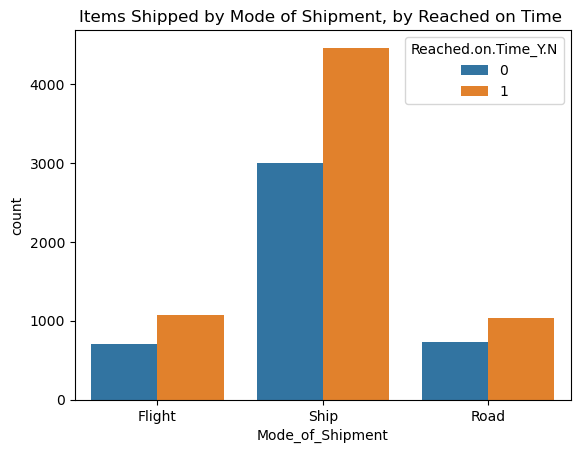

In [86]:
plt.title('Items Shipped by Mode of Shipment, by Reached on Time ')
sns.countplot(x = 'Mode_of_Shipment', hue = 'Reached.on.Time_Y.N', data = df)
plt.show()

* The mode of transportation chosen also affects delivery time. Air freight is faster than shipping by sea for long distances
* Road mode of transportation for short distance also some time  delays delivery .
* Circumstances like weather, transportation issues, or customs delays can sometimes affect delivery times

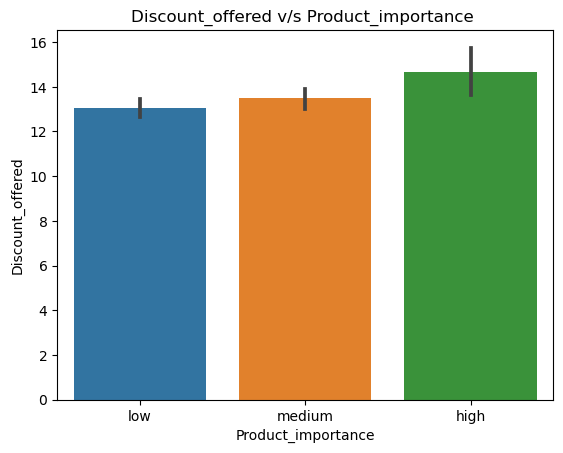

In [71]:
plt.title('Discount_offered v/s Product_importance ')
sns.barplot(x='Product_importance',y='Discount_offered',data=df)
plt.show()

* From the graph we can say high importance products have high discount compaired to low and medium
* Some businesses offer discounts on shipping costs based on the importance of the products being shipped.
* For high-importance or high-value products, they may be willing to absorb a portion of the shipping expenses to provide customers with a better deal or to meet delivery time requirements

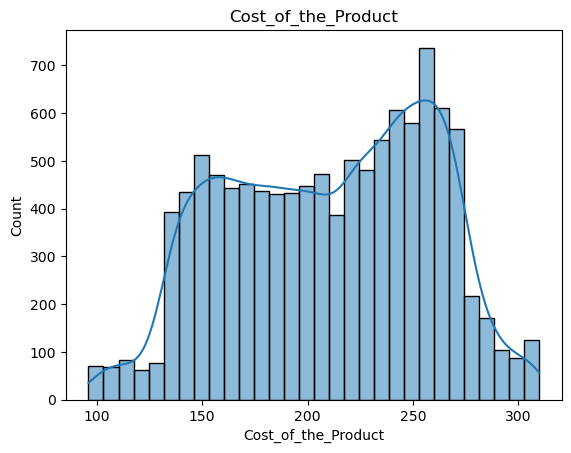

In [16]:
plt.title('Cost_of_the_Product')
sns.histplot(data=df,x='Cost_of_the_Product', kde=True)
plt.show()

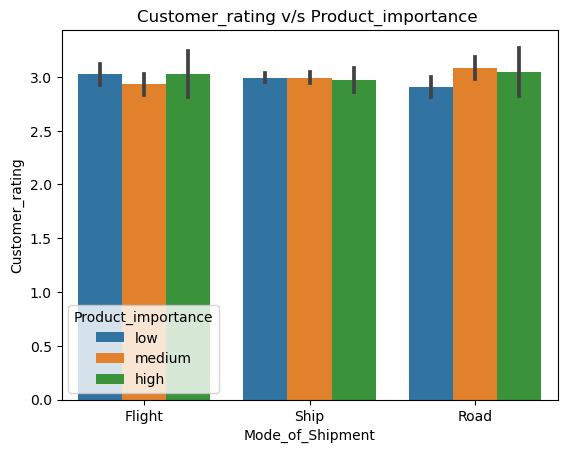

In [80]:
plt.title('Customer_rating v/s Product_importance ')
sns.barplot(data=df,y='Customer_rating',x='Mode_of_Shipment',hue='Product_importance')
plt.show()

* Products with high customer ratings are often considered important for maintaining a positive reputation and customer loyalty.
* Prioritizing Shipment Quality,Shipping Methods and Services,Handling and Packaging these context of shipment decisions helps to meet or exceed customer expectations ,can contribute to positive customer ratings

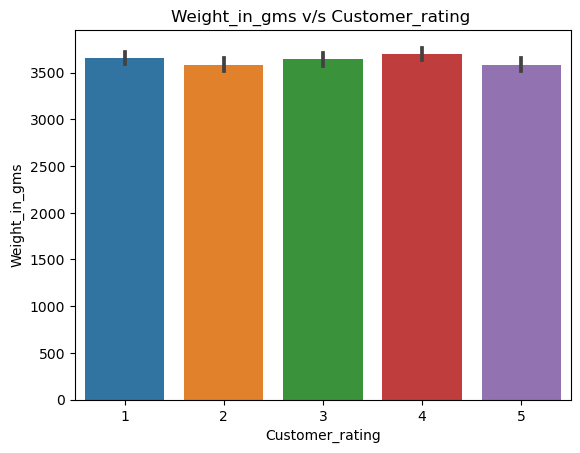

In [19]:
plt.title('Weight_in_gms v/s Customer_rating ')
sns.barplot(x='Customer_rating',y='Weight_in_gms',data=df)
plt.show()

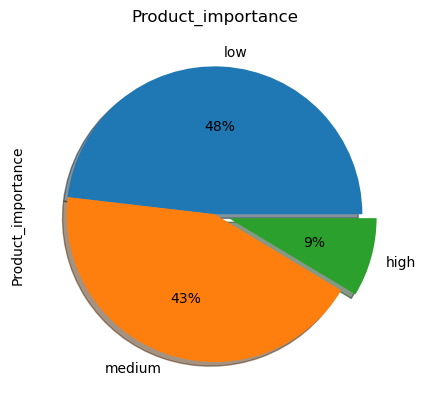

In [20]:
plt.title('Product_importance')
df['Product_importance'].value_counts().plot.pie(explode=(0,0,0.1),autopct="%.0f%%",shadow=True)
plt.show()

* count of high importance products are really less

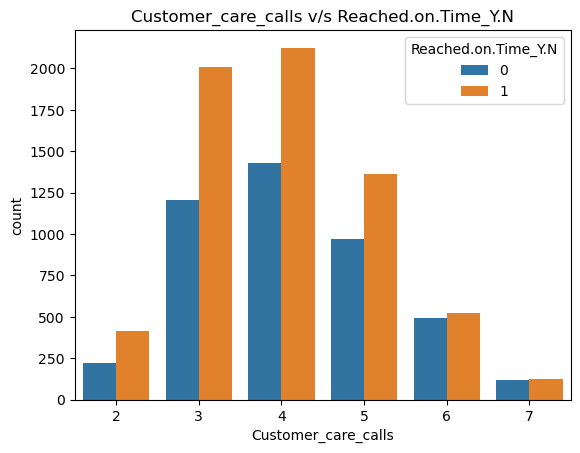

In [85]:
plt.title('Customer_care_calls v/s Reached.on.Time_Y.N')
sns.countplot(x = 'Customer_care_calls', hue = 'Reached.on.Time_Y.N', data = df)
plt.show()

* Customers are more likely to contact customer care when their orders are delayed or do not arrive on time.
* customers are more likely to contact customer care when they have other issues not related to delivery timeliness, such as product quality or billing concerns.

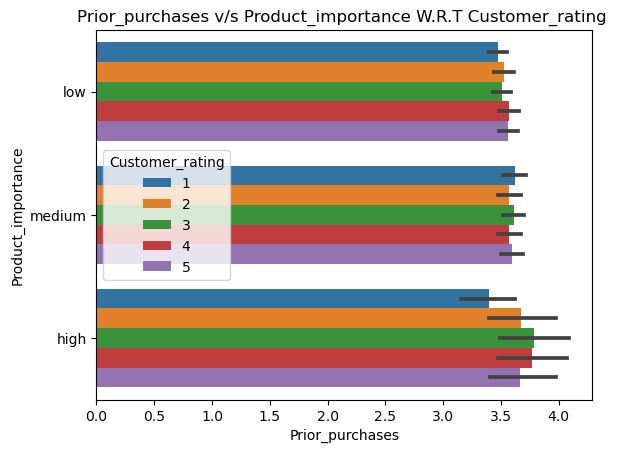

In [22]:
plt.title('Prior_purchases v/s Product_importance W.R.T Customer_rating ')
sns.barplot(x='Prior_purchases',y='Product_importance',hue='Customer_rating',data=df)
plt.show()

* "Product_importance" and "Customer_rating" can vary depending on customer expectations and the quality of the product.

<Axes: title={'center': 'Customer_rating'}, ylabel='Customer_rating'>

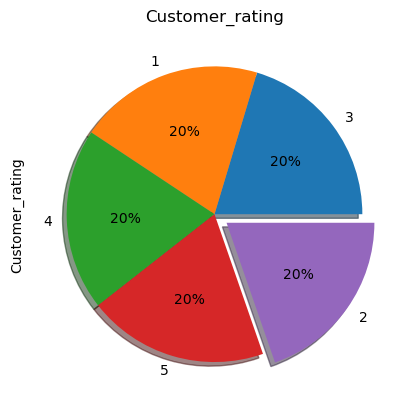

In [26]:
plt.title('Customer_rating')
df['Customer_rating'].value_counts().plot.pie(explode=(0,0,0,0,0.1),autopct="%.0f%%",shadow=True)

* Count of each rating is 20%

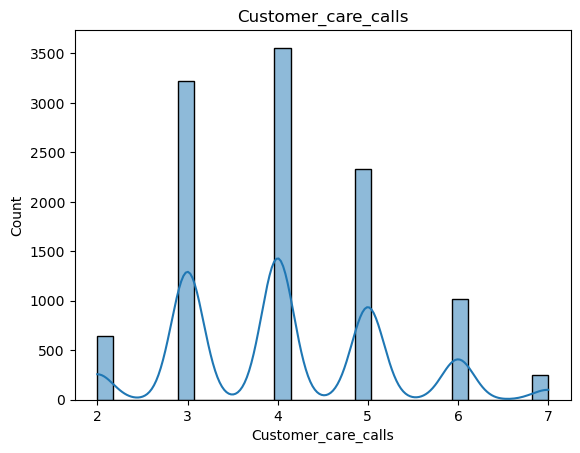

In [23]:
plt.title('Customer_care_calls')
sns.histplot(data=df,x='Customer_care_calls', kde=True)
plt.show()

* It measures the number of calls or inquiries made by customers to the customer care 
* These calls can be related to various issues, including order status, delivery concerns, product quality, or any other inquiries or complaints.

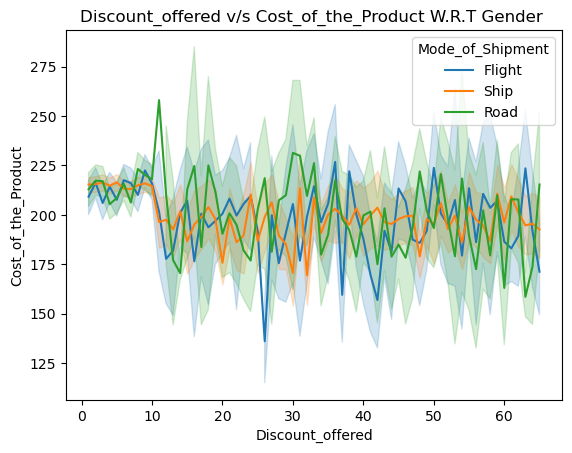

In [87]:
plt.title('Discount_offered v/s Cost_of_the_Product W.R.T Mode_of_Shipment ')
sns.lineplot(x='Discount_offered',y='Cost_of_the_Product',hue='Mode_of_Shipment',data=df)
plt.show()

* Some shipment methods may have higher associated costs due to speed, insurance, or handling requirements. Businesses may pass these additional costs on to customers, which can affect the product's overall price
* Customers may be willing to pay more for a product with faster shipping if the discount offered makes it affordable

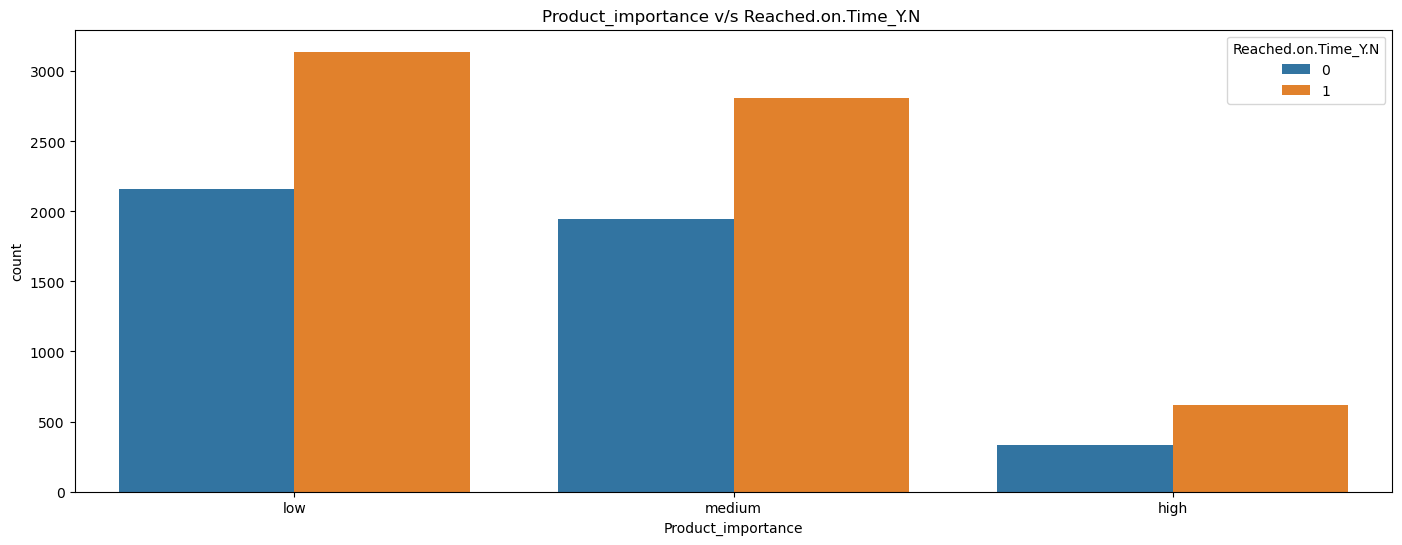

In [88]:
plt.figure(figsize = (17, 6))
plt.title('Product_importance v/s Reached.on.Time_Y.N ')
sns.countplot(x = 'Product_importance', hue = 'Reached.on.Time_Y.N', data = df)
plt.show()

* Here count of not deliverd on time (1) more for all product .May be the importance of the product may not significantly affect its on-time delivery.
* company's prioritization of different products, and its commitment to ensuring that highly important products reach customers on time.

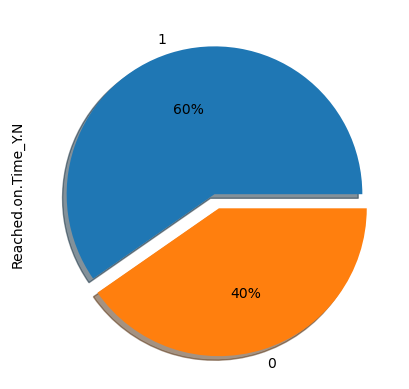

In [28]:
df['Reached.on.Time_Y.N'].value_counts().plot.pie(explode=(0,0.1),autopct="%.0f%%",shadow=True)
plt.show()

* Imbalenced data

In [29]:
df.groupby(['Product_importance'])['Mode_of_Shipment'].count().reset_index()

,Product_importance,Mode_of_Shipment
0,high,948
1,low,5297
2,medium,4754


In [30]:
df.groupby(['Product_importance'])['Discount_offered','Cost_of_the_Product','Prior_purchases'].value_counts().reset_index()

C:\Users\DELL\AppData\Local\Temp\ipykernel_19548\457774124.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Product_importance'])['Discount_offered','Cost_of_the_Product','Prior_purchases'].value_counts().reset_index()


,Product_importance,Discount_offered,Cost_of_the_Product,Prior_purchases,0
0,high,7,161,3,3
1,high,10,247,10,2
2,high,7,211,3,2
3,high,7,201,3,2
4,high,7,177,2,2
...,...,...,...,...,...
8937,medium,9,273,4,1
8938,medium,9,272,2,1
8939,medium,9,271,2,1
8940,medium,9,270,10,1


In [31]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [32]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


# Lable Encoding

In [33]:
df1=df.copy()

In [34]:
df1=pd.get_dummies(df1,columns=['Mode_of_Shipment','Product_importance','Gender'],drop_first=True)

In [35]:
df1

,ID,Warehouse_block,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,1,D,4,2,177,3,44,1233,1,0,0,1,0,0
1,2,F,4,5,216,2,59,3088,1,0,0,1,0,1
2,3,A,2,2,183,4,48,3374,1,0,0,1,0,1
3,4,B,3,3,176,4,10,1177,1,0,0,0,1,1
4,5,C,2,2,184,3,46,2484,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,4,1,252,5,1,1538,1,0,1,0,1,0
10995,10996,B,4,1,232,5,6,1247,0,0,1,0,1,0
10996,10997,C,5,4,242,5,4,1155,0,0,1,1,0,0
10997,10998,F,5,2,223,6,2,1210,0,0,1,0,1,1


In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['Warehouse_block']=le.fit_transform(df1['Warehouse_block'])

In [37]:
df1

,ID,Warehouse_block,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,1,3,4,2,177,3,44,1233,1,0,0,1,0,0
1,2,4,4,5,216,2,59,3088,1,0,0,1,0,1
2,3,0,2,2,183,4,48,3374,1,0,0,1,0,1
3,4,1,3,3,176,4,10,1177,1,0,0,0,1,1
4,5,2,2,2,184,3,46,2484,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,0,4,1,252,5,1,1538,1,0,1,0,1,0
10995,10996,1,4,1,232,5,6,1247,0,0,1,0,1,0
10996,10997,2,5,4,242,5,4,1155,0,0,1,1,0,0
10997,10998,4,5,2,223,6,2,1210,0,0,1,0,1,1


In [38]:
x=df1.drop(['Reached.on.Time_Y.N','ID'],axis=1)

In [39]:
x

,Warehouse_block,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,3,4,2,177,3,44,1233,0,0,1,0,0
1,4,4,5,216,2,59,3088,0,0,1,0,1
2,0,2,2,183,4,48,3374,0,0,1,0,1
3,1,3,3,176,4,10,1177,0,0,0,1,1
4,2,2,2,184,3,46,2484,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,0,4,1,252,5,1,1538,0,1,0,1,0
10995,1,4,1,232,5,6,1247,0,1,0,1,0
10996,2,5,4,242,5,4,1155,0,1,1,0,0
10997,4,5,2,223,6,2,1210,0,1,0,1,1


In [40]:
y=df1['Reached.on.Time_Y.N']
y

0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: Reached.on.Time_Y.N, Length: 10999, dtype: int64

In [41]:
# splitting dataset for  train test 

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [43]:
x_train

,Warehouse_block,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
9957,1,7,4,282,4,6,1800,0,1,1,0,1
1507,4,4,1,135,2,64,1471,0,0,0,1,0
6382,2,4,1,214,2,10,4447,0,1,1,0,0
1559,4,3,1,171,2,1,1629,0,1,1,0,1
5703,1,5,5,248,2,4,5587,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2,3,5,275,2,7,4619,1,0,1,0,0
5191,4,5,5,187,4,9,5326,1,0,0,1,0
5390,0,4,2,137,2,2,5804,0,1,0,1,0
860,0,5,3,144,6,35,1009,0,1,0,1,0


In [44]:
y_train

9957    0
1507    1
6382    0
1559    1
5703    0
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: Reached.on.Time_Y.N, Length: 7699, dtype: int64

In [45]:
# scaling

In [46]:
scaler=StandardScaler()
x_train1=scaler.fit_transform(x_train)
x_train=pd.DataFrame(x_train1,columns=x.columns)
x_train

,Warehouse_block,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,-0.894636,2.546375,0.709617,1.476283,0.268305,-0.453434,-1.113175,-0.435204,0.689543,1.035841,-0.870496,0.99961
1,1.117773,-0.058764,-1.416196,-1.564598,-1.039087,3.128587,-1.314043,-0.435204,-1.450236,-0.965399,1.148771,-1.00039
2,-0.223833,-0.058764,-1.416196,0.069617,-1.039087,-0.206398,0.502928,-0.435204,0.689543,1.035841,-0.870496,-1.00039
3,1.117773,-0.927144,-1.416196,-0.819893,-1.039087,-0.762229,-1.217578,-0.435204,0.689543,1.035841,-0.870496,0.99961
4,-0.894636,0.809616,1.418221,0.772950,-1.039087,-0.576952,1.198945,-0.435204,0.689543,1.035841,-0.870496,0.99961
...,...,...,...,...,...,...,...,...,...,...,...,...
7694,-0.223833,-0.927144,1.418221,1.331480,-1.039087,-0.391675,0.607941,2.297775,-1.450236,1.035841,-0.870496,-1.00039
7695,1.117773,0.809616,1.418221,-0.488912,0.268305,-0.268157,1.039594,2.297775,-1.450236,-0.965399,1.148771,-1.00039
7696,-1.565439,-0.058764,-0.707592,-1.523226,-1.039087,-0.700470,1.331433,-0.435204,0.689543,-0.965399,1.148771,-1.00039
7697,-1.565439,0.809616,0.001012,-1.378422,1.575697,1.337577,-1.596113,-0.435204,0.689543,-0.965399,1.148771,-1.00039


In [47]:
x_test1=scaler.fit_transform(x_test)
x_test=pd.DataFrame(x_test1,columns=x.columns)
x_test

,Warehouse_block,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,1.118644,-0.021164,1.429559,0.144022,-0.343064,0.773292,-0.985967,-0.439384,0.685994,-0.960186,-0.877176,1.028902
1,-1.565126,-0.916551,-1.389831,0.228437,-0.343064,-0.458659,1.174289,2.275912,-1.457738,1.041465,-0.877176,-0.971910
2,1.118644,-0.916551,-0.684984,0.122919,0.321320,-0.643452,0.235047,-0.439384,-1.457738,1.041465,-0.877176,-0.971910
3,0.447702,0.874224,-1.389831,-1.037778,0.985704,-0.766647,0.621794,-0.439384,-1.457738,1.041465,-0.877176,-0.971910
4,-0.894183,0.874224,0.724711,0.418369,-1.007447,1.882048,-0.761286,-0.439384,0.685994,-0.960186,1.140023,-0.971910
...,...,...,...,...,...,...,...,...,...,...,...,...
3295,-1.565126,-0.916551,-1.389831,-0.657914,0.321320,-0.273866,1.269441,-0.439384,0.685994,-0.960186,1.140023,1.028902
3296,1.118644,-0.916551,1.429559,1.283616,-0.343064,-0.397062,0.491036,-0.439384,0.685994,-0.960186,-0.877176,-0.971910
3297,-0.223241,-0.916551,0.019864,1.156994,-1.007447,-0.458659,0.271880,-0.439384,0.685994,1.041465,-0.877176,1.028902
3298,-0.223241,-0.021164,-0.684984,1.346926,0.321320,0.773292,-0.267724,-0.439384,0.685994,1.041465,-0.877176,-0.971910


# Model Creating
   ========================

## LogisticRegression

In [48]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [109]:
y_pred_tr=dtc.predict(x_train)
y_pred_tr

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [110]:
accuracy=accuracy_score(y_pred_tr,y_train)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7347707494479803


In [49]:
y_pred=LR.predict(x_test)


In [50]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.6354545454545455

In [51]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.58      0.56      1312
           1       0.71      0.67      0.69      1988

    accuracy                           0.64      3300
   macro avg       0.62      0.63      0.62      3300
weighted avg       0.64      0.64      0.64      3300



* Precision for class 0 is 0.54, meaning 54% of predictions for class 0 were correct.

* Recall for class 0 is 0.58, indicating that 58 % of actual class 0 instances were correctly identified.

* The F1-score balances precision and recall, providing an overall measure of model performance.

* The accuracy of the model is 64%

In [102]:
# Create a logistic regression model with L1 regularization (Lasso)
lasso_classifier = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')


In [103]:
lasso_classifier.fit(x_train, y_train)


LogisticRegression(penalty='l1', solver='liblinear')

In [104]:
y_pred = lasso_classifier.predict(x_test)


In [105]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6363636363636364


## Random Forest  Classifier


In [56]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=100,random_state=42)

In [57]:
RF.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [115]:
y_pred_rf=dtc.predict(x_train)
y_pred_rf

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [116]:
accuracy=accuracy_score(y_pred_rf,y_train)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7347707494479803


In [58]:
pred_rf=RF.predict(x_test)

In [59]:
accuracy=accuracy_score(pred_rf,y_test)
print(f"accuracy:{accuracy}")

accuracy:0.6627272727272727


In [60]:
report2 = classification_report(y_test, pred_rf)
print("Classification Report:")
print(report2)

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.69      0.62      1312
           1       0.76      0.64      0.70      1988

    accuracy                           0.66      3300
   macro avg       0.66      0.67      0.66      3300
weighted avg       0.68      0.66      0.67      3300




* Precision for class 0 is 0.56, meaning 56% of predictions for class 0 were correct.

* Precision for class 1 is 0.76, meaning 76% of predictions for class 1 were correct.

* Recall for class 0 is 0.69, indicating that 69% of actual class 0 instances were correctly identified.

* Recall for class 1 is 0.64, indicating that 64% of actual class 1 instances were correctly identified.
* The accuracy of the model is 66%

## GradientBoostingClassifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier(loss='log_loss',max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    learning_rate=0.1,
    n_estimators=100,random_state=42)
GBC.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [117]:
y_pred_gb=dtc.predict(x_train)
y_pred_gb

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [118]:
accuracy=accuracy_score(y_pred_gb,y_train)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7347707494479803


In [62]:
pred_gbc=GBC.predict(x_test)

In [63]:
accuracy=accuracy_score(y_test,pred_gbc)
report = classification_report(y_test, pred_gbc)


In [64]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.6724242424242424
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.86      0.68      1312
           1       0.86      0.55      0.67      1988

    accuracy                           0.67      3300
   macro avg       0.71      0.70      0.67      3300
weighted avg       0.74      0.67      0.67      3300



* Precision for class 0 is 0.56, meaning 56% of predictions for class 0 were correct.

* Precision for class 1 is 0.86, meaning 86% of predictions for class 1 were correct.

* Recall for class 0 is 0.86, indicating that 86% of actual class 0 instances were correctly identified.

* Recall for class 1 is 0.55, indicating that 55% of actual class 1 instances were correctly identified.
* The accuracy of the model is 67%

## XGBClassifier

In [65]:
import xgboost as xgb
xgb_c=xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_c.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [119]:
y_pred_xg=dtc.predict(x_train)
y_pred_xg

accuracy=accuracy_score(y_pred_xg,y_train)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7347707494479803


In [66]:
y_pred_xg=xgb_c.predict(x_test)

In [67]:
accuracy=accuracy_score(y_test,y_pred_xg)
report = classification_report(y_test, y_pred_xg)
accuracy

0.6642424242424242

In [68]:

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.6642424242424242
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.72      0.63      1312
           1       0.77      0.63      0.69      1988

    accuracy                           0.66      3300
   macro avg       0.67      0.67      0.66      3300
weighted avg       0.69      0.66      0.67      3300



* Precision for class 0 is 0.56, meaning 56% of predictions for class 0 were correct.

* Precision for class 1 is 0.77, meaning 77% of predictions for class 1 were correct.

* Recall for class 0 is 0.72, indicating that 72% of actual class 0 instances were correctly identified.

* Recall for class 1 is 0.63, indicating that 63% of actual class 1 instances were correctly identified.
* The accuracy of the model is 66%

## DecisionTreeClassifier

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=42)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [111]:
y_pred_dt=dtc.predict(x_train)
y_pred_dt

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [112]:
accuracy=accuracy_score(y_pred_dt,y_train)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7347707494479803


In [114]:
report = classification_report(y_train, y_pred_dt)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.86      0.72      3124
           1       0.87      0.65      0.74      4575

    accuracy                           0.73      7699
   macro avg       0.75      0.75      0.73      7699
weighted avg       0.77      0.73      0.74      7699



* Precision for class 0 is 0.63, meaning 63% of predictions for class 0 were correct.
* Precision for class 1 is 0.87, meaning 87% of predictions for class 1 were correct.

* Recall for class 0 is 0.86, indicating that 86% of actual class 0 instances were correctly identified.
* Recall for class 1 is 0.65, indicating that 65% of actual class 1 instances were correctly identified.

* The accuracy of the model is 73%

In [53]:
y_pred_dtc=dtc.predict(x_test)

In [54]:
accuracy=accuracy_score(y_pred_dtc,y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6790909090909091


In [55]:
report = classification_report(y_test, y_pred_dtc)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.90      0.69      1312
           1       0.89      0.53      0.67      1988

    accuracy                           0.68      3300
   macro avg       0.73      0.72      0.68      3300
weighted avg       0.76      0.68      0.68      3300




* Precision for class 0 is 0.56, meaning 56% of predictions for class 0 were correct.
* Precision for class 1 is 0.89, meaning 89% of predictions for class 1 were correct.

* Recall for class 0 is 0.90, indicating that 90% of actual class 0 instances were correctly identified.
* Recall for class 1 is 0.53, indicating that 53% of actual class 1 instances were correctly identified.

* The accuracy of the model is 68%

 ***Using Decisiontree classifier give better accuracy rather than other algorithm model***

# Tuning the hyperparameters of a Decisiontree classifier

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [91]:
# Create a GridSearchCV object
grid_search = GridSearchCV(dtc, param_grid, cv=5)

In [93]:
# Fit the grid search to your data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [94]:
best_params = grid_search.best_params_
best_dt_classifier = grid_search.best_estimator_

In [95]:
best_params

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [96]:
best_dt_classifier

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [97]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=42,min_samples_leaf= 1,
 min_samples_split= 2)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [99]:
y_pred_dtc1=dtc.predict(x_test)
y_pred_dtc1

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [106]:
y_pred_dtc2=dtc.predict(x_train)
y_pred_dtc2

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [108]:
accuracy=accuracy_score(y_pred_dtc2,y_train)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7347707494479803


In [100]:
accuracy=accuracy_score(y_pred_dtc1,y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6618181818181819


In [101]:
report = classification_report(y_test, y_pred_dtc1)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.76      0.64      1312
           1       0.79      0.60      0.68      1988

    accuracy                           0.66      3300
   macro avg       0.67      0.68      0.66      3300
weighted avg       0.70      0.66      0.66      3300



* Tunig decision tree parameter leads to decreasing accuracy

# Recommendations
  ===============================

* Warehouses are often organized into various blocks or zones to facilitate efficient storage and retrieval of items. 33% products are more stored in block F may be that loaction maximizes efficiency and accessibility. It helps streamline the movement of goods, reduce picking and packing times, and improve overall warehouse operations

* Shipping by sea is an efficient method for transporting large quantities of goods over long distances. It's commonly used for international trade, moving goods between continents, and transporting bulk cargo. Here we can also say that most of the product shipped throgh by sea  may be most products are mean to be large quantities of goods over long distances.Efficient product shipment is crucial for customer satisfaction, as delays or mishandling can lead to unhappy customers.

* The mode of transportation chosen also affects delivery time. Air freight is faster than shipping by sea for long distances. Circumstances like weather, transportation issues, or customs delays can sometimes affect Road mode of transportation for short distance  delivery. so it's essential to have some flexibility when setting expectations.

* The importance of the products in a shipment can affect shipping decisions and whether discounts are offered on shipping costs. Businesses must strike a balance between meeting customer expectations, maintaining profitability, and managing shipping expenses when deciding on discounts in the context of product shipments.

* To encourage the purchase of high-importance products, businesses may offer shipping discounts or incentives, such as free or reduced-cost shipping. This can lead to higher customer ratings and increased sales

* The quality of the shipment experience for these products is a critical factor in ensuring positive feedback and customer loyalty.Prioritizing Shipment Quality,Shipping Methods and Services,Handling and Packaging these context of shipment decisions helps to meet or exceed customer expectations ,can contribute to positive customer ratings

* Customers are more likely to contact customer care when their orders are delayed or do not arrive on time or more likely to when they have other issues not related to delivery timeliness, such as product quality or billing concerns.Addressing delivery efficiency and timeliness is crucial for reducing customer care calls and improving customer satisfaction.

* If company prioritizes the efficient delivery of high-importance products to maintain customer satisfaction, meet strategic goals, and ensure the success of these products in the market.